In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=30

In [4]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantDataset",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE,
    
)

Found 2153 files belonging to 3 classes.


In [5]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 2 0 0 1 0 1 0 2 1 2 0 1 1 1 0 1 0 0 1 0 2 1 1 1 0 1 0 1 1 1]


In [8]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0])
    print(label_batch.numpy())

tf.Tensor(
[[[143. 148. 167.]
  [144. 149. 168.]
  [146. 151. 170.]
  ...
  [126. 128. 141.]
  [127. 129. 142.]
  [132. 134. 147.]]

 [[141. 146. 165.]
  [143. 148. 167.]
  [145. 150. 169.]
  ...
  [121. 123. 136.]
  [124. 126. 139.]
  [129. 131. 144.]]

 [[145. 150. 169.]
  [145. 150. 169.]
  [146. 151. 170.]
  ...
  [124. 126. 139.]
  [116. 118. 131.]
  [111. 113. 126.]]

 ...

 [[187. 190. 199.]
  [187. 190. 199.]
  [186. 189. 198.]
  ...
  [176. 175. 183.]
  [172. 171. 179.]
  [171. 170. 178.]]

 [[189. 192. 201.]
  [189. 192. 201.]
  [188. 191. 200.]
  ...
  [154. 153. 161.]
  [150. 149. 157.]
  [151. 150. 158.]]

 [[190. 193. 202.]
  [190. 193. 202.]
  [189. 192. 201.]
  ...
  [156. 155. 163.]
  [161. 160. 168.]
  [166. 165. 173.]]], shape=(256, 256, 3), dtype=float32)
[0 1 0 1 0 0 1 1 0 1 2 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 2 1 2 1]


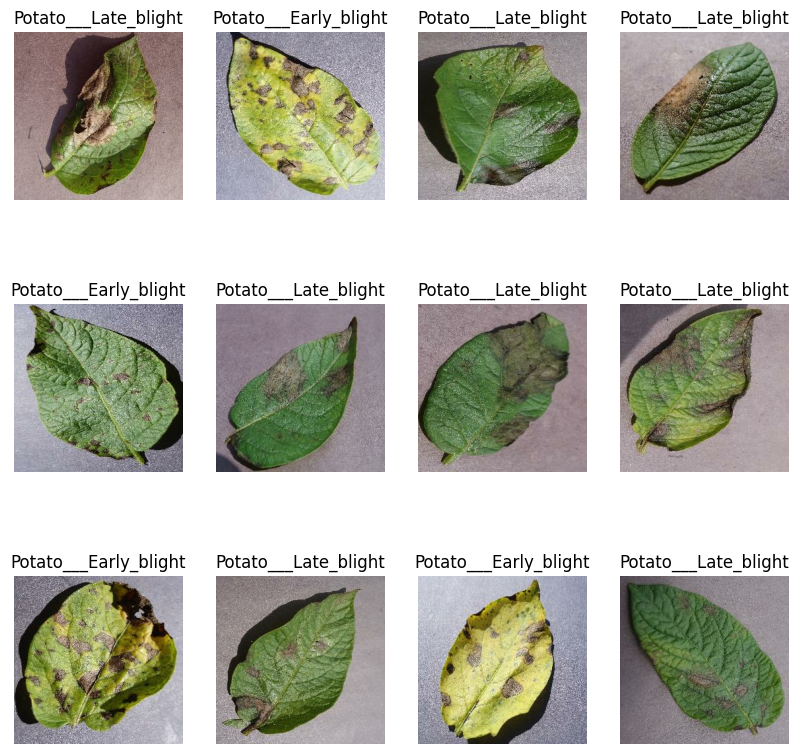

In [9]:
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1) :
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        ax.imshow(image_batch[i].numpy().astype("uint8"))    
        ax.set_title(class_names[label_batch[i]])
        ax.axis("off")




In [10]:
len(dataset)

68

In [11]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [14]:
val_size = 0.1 
len(dataset)*val_size


6.800000000000001

In [15]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)


8

In [17]:
def get_dataset_partitions_tf(ds,train_split=0.8 , val_split=0.1 , test_split = 0.1 , shuffle=True , shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle :
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int (val_split*ds_size)

    train_ds = ds.take(train_size)

    val_ds= ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)

    
    return train_ds,val_ds , test_ds 
    
    

In [18]:
train_ds,val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [22]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),

    layers.Rescaling(1.0/255)
    
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)

    
])

In [25]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model= models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D (64, kernel_size= (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (64, kernel_size= (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes , activation = 'softmax'),
    
    
])


C:\Users\Farhan Inamdar\Desktop\ML_py3.11\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ sequential (Sequential)       │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ sequential_1 (Sequential)     │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d (Conv2D)               │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ ?                     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ ?                     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ ?                     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_3 (Conv2D)             │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_3               │ ?                     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_4 (Conv2D)             │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_4               │ ?                     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_5 (Conv2D)             │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_5               │ ?                     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ ?                     │  0 (unbuilt) │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 712ms/step - accuracy: 0.4475 - loss: 0.9451 - val_accuracy: 0.5469 - val_loss: 0.9098
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 679ms/step - accuracy: 0.6179 - loss: 0.7742 - val_accuracy: 0.5729 - val_loss: 0.8806
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 652ms/step - accuracy: 0.7422 - loss: 0.5816 - val_accuracy: 0.8125 - val_loss: 0.4780
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 617ms/step - accuracy: 0.8470 - loss: 0.3683 - val_accuracy: 0.7969 - val_loss: 0.4431
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 619ms/step - accuracy: 0.9138 - loss: 0.2492 - val_accuracy: 0.8229 - val_loss: 0.5242
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 606ms/step - accuracy: 0.9275 - loss: 0.2175 - val_accuracy: 0.7969 - val_loss: 0.4908
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 622ms/step - accuracy: 0.9090 - loss: 0.2256 - val_accuracy: 0.7760 - val_loss: 0.5109
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 693ms/step - accuracy: 0.9026 - loss: 0.2614 - val_accu

In [29]:
scores= model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - accuracy: 0.9150 - loss: 0.2543


In [29]:
scores

[0.01817203313112259, 0.98828125]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [32]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [33]:
history.history['accuracy']

[0.4809027910232544,
 0.6579861044883728,
 0.7795138955116272,
 0.8396990895271301,
 0.8709490895271301,
 0.8813657164573669,
 0.9120370149612427,
 0.9068287014961243,
 0.8987268805503845,
 0.9334490895271301,
 0.9450231194496155,
 0.9241898059844971,
 0.9502314925193787,
 0.9618055820465088,
 0.9589120149612427,
 0.9635416865348816,
 0.9351851940155029,
 0.9629629850387573,
 0.9803240895271301,
 0.9814814925193787,
 0.9739583134651184,
 0.9803240895271301,
 0.9814814925193787,
 0.9820601940155029,
 0.9884259104728699,
 0.9774305820465088,
 0.9895833134651184,
 0.9733796119689941,
 0.9797453880310059,
 0.9820601940155029]

Text(0.5, 1.0, 'Training and Validation Accuracy')

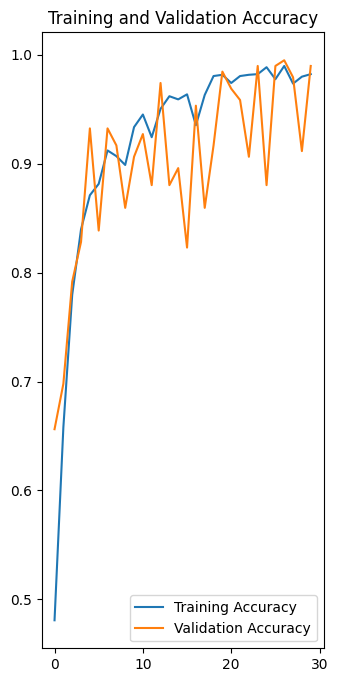

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


first image to predict
first image's actual lable : Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
[9.9999940e-01 5.9922445e-07 1.0313382e-14]
predicted label is :  Potato___Early_blight


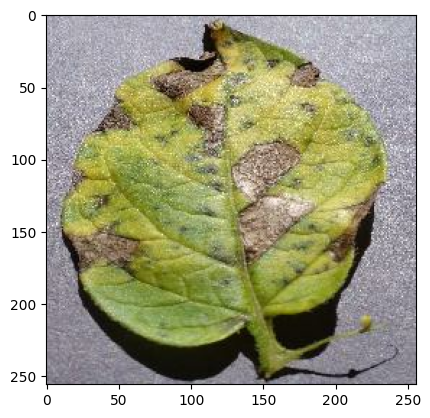

In [35]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print ("first image to predict")
    plt.imshow(first_image)
    print("first image's actual lable :", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print("predicted label is : " ,class_names[np.argmax(batch_prediction[0])])


    

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


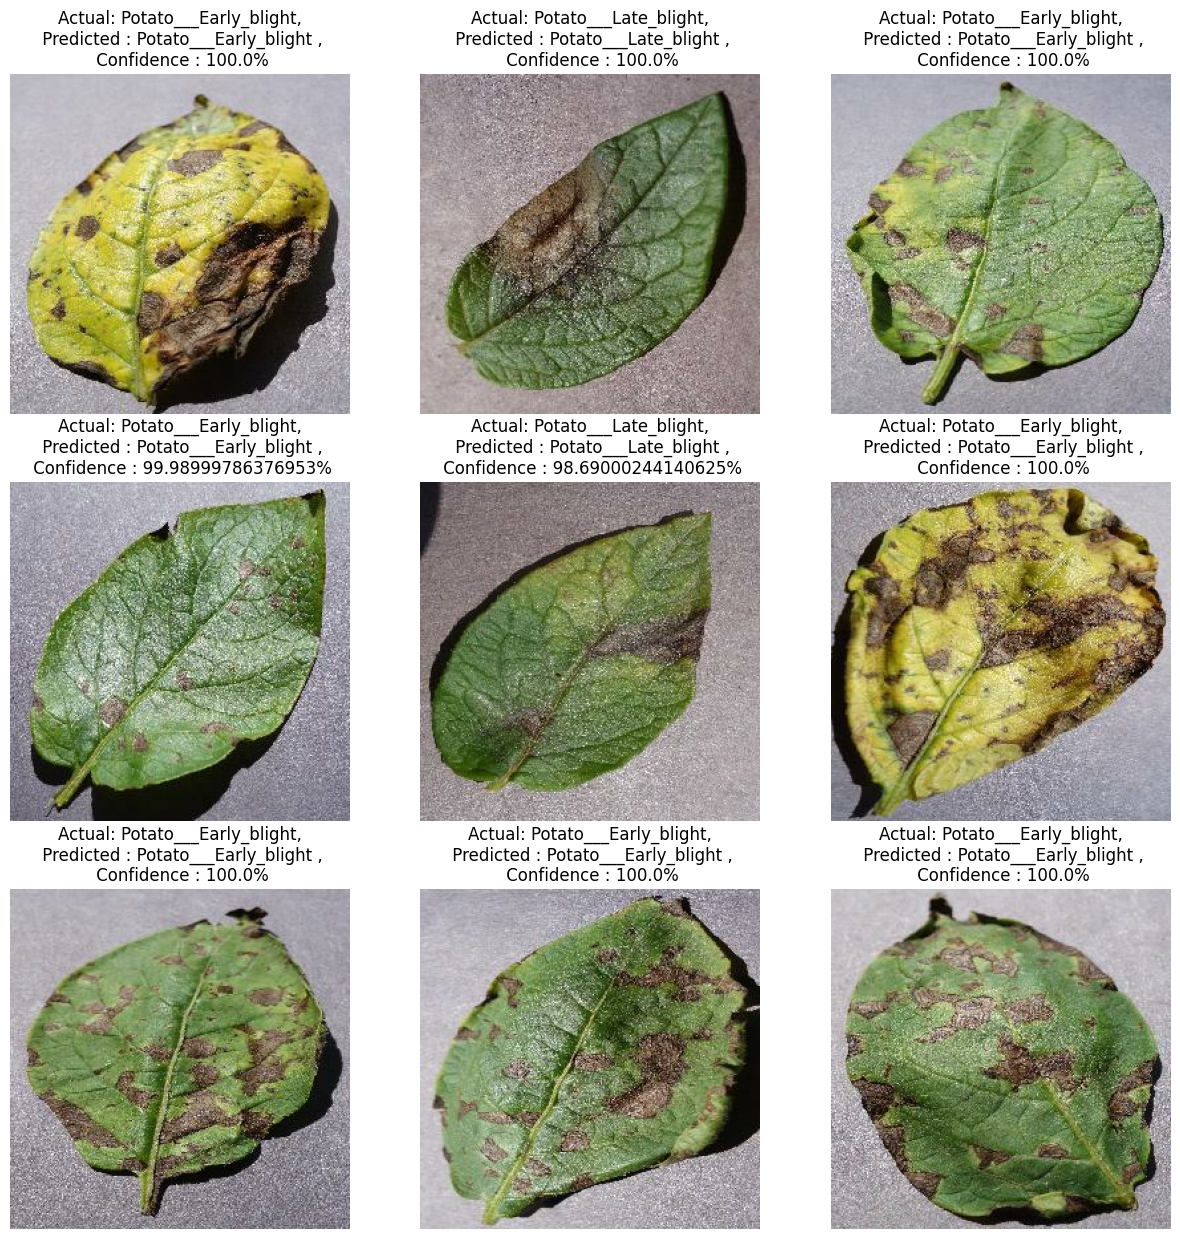

In [37]:
plt.figure(figsize=(15,15))
for images , labels in test_ds.take(1):
    for i in range(9):#predicting for only 9 images
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted : {predicted_class} ,\n Confidence : {confidence}%")
        


        plt.axis("off")
        
    

In [38]:
model.save('trained_model1.keras')

Num GPUs Available: 0


2.18.0
False


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


<Figure size 1000x800 with 0 Axes>

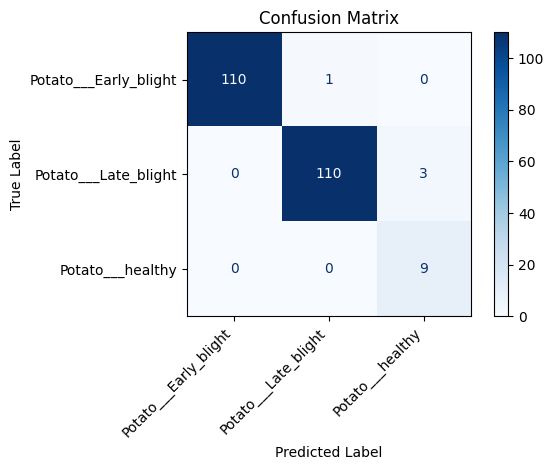

Test Accuracy: 0.9828

Classification Report:
                       precision    recall  f1-score   support

Potato___Early_blight       1.00      0.99      1.00       111
 Potato___Late_blight       0.99      0.97      0.98       113
     Potato___healthy       0.75      1.00      0.86         9

             accuracy                           0.98       233
            macro avg       0.91      0.99      0.94       233
         weighted avg       0.99      0.98      0.98       233



In [45]:
import numpy as np


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to get predictions and true labels from the test dataset
def get_predictions_and_labels(model, dataset):
    all_predictions = []
    all_labels = []
    
    for images, labels in dataset:
        # Get predictions for the batch
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)
        
        # Append to our lists
        all_predictions.extend(predicted_classes)
        all_labels.extend(labels.numpy())
    
    return np.array(all_predictions), np.array(all_labels)

# Get predictions and true labels
y_pred, y_true = get_predictions_and_labels(model, test_ds)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate and print accuracy
accuracy = np.sum(y_pred == y_true) / len(y_true)
print(f"Test Accuracy: {accuracy:.4f}")

# Print classification report for more detailed metrics
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


In [47]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_test and y_pred exist
if 'y_test' in globals() and 'y_pred' in globals():
    cm = confusion_matrix(y_test, y_pred)
    labels = np.unique(y_test)  # Extracting class labels

    # Extract TP, TN, FP, FN values for binary classification
    if cm.shape == (2, 2):  
        TN, FP, FN, TP = cm.ravel()
        print(f"True Positives (TP): {TP}")
        print(f"True Negatives (TN): {TN}")
        print(f"False Positives (FP): {FP}")
        print(f"False Negatives (FN): {FN}")
    else:
        print("Confusion matrix is multi-class. Consider analyzing per-class metrics separately.")

    # Display as heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Using sklearn's ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues")
    plt.show()
else:
    print("Ensure y_test and y_pred are defined before running this cell.")


Ensure y_test and y_pred are defined before running this cell.


In [1]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())  
    y_pred.extend(np.argmax(predictions, axis=1))  

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))


NameError: name 'test_ds' is not defined